In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from zipfile import ZipFile
import urllib.request
import os
from sklearn import naive_bayes

In [5]:
#download and extract datasets
data_url = f'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
file_name = f'../sentiment_sentences.zip'
urllib.request.urlretrieve(data_url, file_name)

with ZipFile(file_name, 'r') as zip:    #readmode
    zip.printdir() 
    zip.extractall(path=r'\data_sets\sentiment_sentences') 

File Name                                             Modified             Size
sentiment labelled sentences/                  2016-07-05 11:32:30            0
sentiment labelled sentences/.DS_Store         2016-07-05 11:32:34         6148
__MACOSX/                                      2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/         2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/._.DS_Store 2016-07-05 11:32:34          212
sentiment labelled sentences/amazon_cells_labelled.txt 2016-07-05 11:30:22        58226
sentiment labelled sentences/imdb_labelled.txt 2015-02-14 16:11:16        85285
__MACOSX/sentiment labelled sentences/._imdb_labelled.txt 2015-02-14 16:11:16          212
sentiment labelled sentences/readme.txt        2015-05-30 17:29:46         1070
__MACOSX/sentiment labelled sentences/._readme.txt 2015-05-30 17:29:46          212
sentiment labelled sentences/yelp_labelled.txt 2016-07-05 11:27:32        61320
__MACOSX/._sen

In [6]:
os.chdir('../..')

In [7]:
!cd sentiment_sentences/; ls

The system cannot find the path specified.


In [8]:
os.chdir('sentiment_sentences/')
!ls

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'sentiment_sentences/'

In [ ]:
!mv 'sentiment labelled sentences/' sentiment_labelled_sentences

In [24]:
pwd

'c:\\Users\\User\\Documents\\Github\\thinkful_notes\\data_sets'

In [26]:
#for work computer
os.chdir(r'c:/Users/User/Documents/Github/thinkful_notes/data_sets/sentiment_labelled_sentences/')
%ls

 Volume in drive C is Windows
 Volume Serial Number is 48D2-E854

 Directory of c:\Users\User\Documents\Github\thinkful_notes\data_sets\sentiment_labelled_sentences

07/20/2019  05:10 PM    <DIR>          .
07/20/2019  05:10 PM    <DIR>          ..
07/20/2019  05:10 PM             6,148 .DS_Store
07/20/2019  05:10 PM            58,226 amazon_cells_labelled.txt
07/20/2019  05:10 PM            85,285 imdb_labelled.txt
07/20/2019  05:10 PM             1,070 readme.txt
07/20/2019  05:10 PM            61,320 yelp_labelled.txt
               5 File(s)        212,049 bytes
               2 Dir(s)  392,819,499,008 bytes free


In [41]:
#import data to DF
yelp_df = pd.read_csv(r'C:\Users\User\Documents\Github\thinkful_notes\data_sets\sentiment_labelled_sentences\yelp_labelled.txt', sep='\t', header=None)

In [42]:
yelp_df.rename(index=str, columns={0:'sentence', 1:'score'}, inplace=True)

In [43]:
pd.set_option('display.max_colwidth', 120)
yelp_df.head(20)

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


In [44]:
#build classifier
keywords = ['loved', 'prompt', 'overpriced', 'slow', 'tasty', 'delicious', 'favorite', 'angry', 'great', 'would not']
for kword in keywords:
    yelp_df[kword] = yelp_df.sentence.str.contains(' ' + str(kword) + '[ \.]', case=False)
yelp_df.head()

,sentence,score,loved,prompt,overpriced,slow,tasty,delicious,favorite,angry,great,would not
0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,True,False,False,False,False,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,True,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so were the prices.,1,False,False,False,False,False,False,False,False,True,False


In [45]:
yelp_df['yelling'] = yelp_df.sentence.str.isupper()

In [46]:
yelp_df.shape

(1000, 13)

In [49]:
yelp_df.iloc[:,2:-1].sum()

loved          9
prompt         1
overpriced     4
slow          10
tasty          8
delicious     11
favorite       2
angry          1
great         43
would not      6
dtype: int64

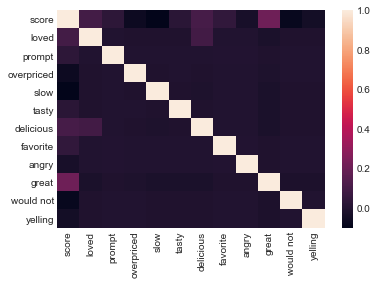

In [50]:
#investigate keywords
sns.set_style(style='dark')
sns.heatmap(yelp_df.corr());

In [51]:
data = yelp_df.iloc[:,2:-1]
target = yelp_df.score
data.head()

,loved,prompt,overpriced,slow,tasty,delicious,favorite,angry,great,would not
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False


In [52]:
#model
nb_bernou = naive_bayes.BernoulliNB()
nb_bernou.fit(data, target)

#predict
y_predict = nb_bernou.predict(data)

#result
print('model correctly predicted {} and missed {}'.format((y_predict==target).sum(),(y_predict!=target).sum()))

model correctly predicted 567 and missed 433


In [53]:
yelp_df['y_predict'] = y_predict
yelp_df.head()

,sentence,score,loved,prompt,overpriced,slow,tasty,delicious,favorite,angry,great,would not,yelling,y_predict
0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False,False,1
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,0
2,Not tasty and the texture was just nasty.,0,False,False,False,False,True,False,False,False,False,False,False,1
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,True,False,False,False,False,False,False,False,False,False,False,1
4,The selection on the menu was great and so were the prices.,1,False,False,False,False,False,False,False,False,True,False,False,1


In [54]:
y_predict_df = pd.DataFrame(y_predict)
results = pd.merge(yelp_df[['score']], y_predict_df, left_index=True, right_index=True)#indexes were not named
results.head()

,score,0


In [18]:
results = pd.concat([yelp_df.reset_index(), y_predict_df.reset_index()], axis=1) #reset_index fixed problem.
results.head()


,index,sentence,score,loved,prompt,overpriced,slow,tasty,delicious,favorite,angry,great,would not,yelling,index,0
0,0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False,False,0,1
1,1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,1,0
2,2,Not tasty and the texture was just nasty.,0,False,False,False,False,True,False,False,False,False,False,False,2,0
3,3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,True,False,False,False,False,False,False,False,False,False,False,3,1
4,4,The selection on the menu was great and so were the prices.,1,False,False,False,False,False,False,False,False,True,False,False,4,1
